In [211]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
# matplotlib.rcParams['figure.figsize'] = (16, 10)
from sklearn import linear_model
from scipy import stats
import os
import datetime
import seaborn as sns
sns.set(color_codes=True)

cs = ['r', 'b', 'g', 'c']
DEBUG_DIR = '/home/denis/.birales/debug/detection'
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

def plot_candidate(root, csv_file):    
    df = pd.read_csv(os.path.join(DEBUG_DIR, root, csv_file), dtype={'time': datetime.datetime})
    g = sns.lmplot(x="channel", y="time_sample", data=df, fit_reg=False)
       
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['channel'],df['time_sample'])
        
    print(root)
    print('Score:', df[['time_sample', 'channel']].corr().iloc[0,1])
    print('Size:', df['channel'].size)
    print('Gradient:', slope, r_value, p_value)
    print('No. of activated beams:', df['beam_id'].unique().size)
    print('Mean Doppler Shift:', (410.105 - df['channel'].mean())*1e6)
    print('Mean Channel:', df['channel'].mean())
    print()

20180314
Score: -0.994509862872
Size: 50
Gradient: -81758.9473333 -0.994509862872 1.01722628501e-48
No. of activated beams: 5
Mean Doppler Shift: -8078.11743993625
Mean Channel: 410.11307811743995

20180315
Score: -0.998671324132
Size: 50
Gradient: -81710.428424 -0.998671324132 1.73565034172e-63
No. of activated beams: 5
Mean Doppler Shift: 30901.794399994742
Mean Channel: 410.0740982056



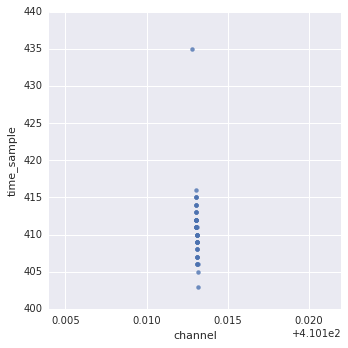

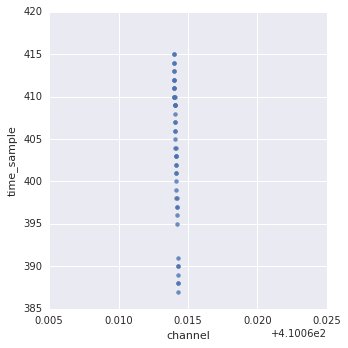

In [210]:
plot_candidate('20180314', 'BIRALES_OUT_20170630_001.csv')
plot_candidate('20180315', 'BIRALES_OUT_20170630_001.csv')


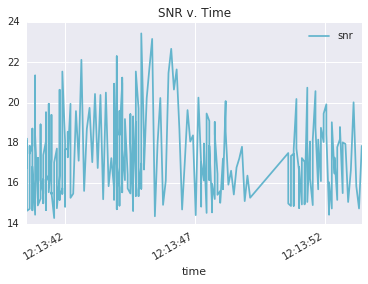

In [13]:
df[l.inlier_mask_].plot(x='time', y='snr',color=cs[3], title='SNR v. Time')

In [190]:
df[l.inlier_mask_].plot(x='channel', y='snr', kind='scatter', color=cs[3], title='SNR v. Channel')

ValueError: Item wrong length 263 instead of 5526.